In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers,datasets

In [5]:
(X_train,Y_train),(X_test,Y_test) = datasets.fashion_mnist.load_data()

In [7]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [9]:
X_train,X_test = X_train/255.0,X_test/255.0

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1))),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Conv2D(64,(3,3),activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Conv2D(128,(3,3),activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Flatten()),
model.add(layers.Dense(128,activation='relu')),
model.add(layers.Dense(10,activation='softmax'))

In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy','mse','mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 1, 1, 128)        

In [27]:
CNN = model.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))

Epoch 1/20
1875/1875 [==============================] - 77s 41ms/step - loss: 1.0439 - accuracy: 0.6058 - mse: 27.6486 - mae: 4.4200 - val_loss: 0.7657 - val_accuracy: 0.7045 - val_mse: 27.6601 - val_mae: 4.4200
Epoch 2/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.7072 - accuracy: 0.7341 - mse: 27.6631 - mae: 4.4200 - val_loss: 0.6834 - val_accuracy: 0.7486 - val_mse: 27.6664 - val_mae: 4.4200
Epoch 3/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.6342 - accuracy: 0.7628 - mse: 27.6667 - mae: 4.4200 - val_loss: 0.6477 - val_accuracy: 0.7587 - val_mse: 27.6680 - val_mae: 4.4200
Epoch 4/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.5820 - accuracy: 0.7831 - mse: 27.6692 - mae: 4.4200 - val_loss: 0.5803 - val_accuracy: 0.7828 - val_mse: 27.6703 - val_mae: 4.4200
Epoch 5/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.5457 - accuracy: 0.7975 - mse: 27.6711 - mae: 4.4200 - val_loss: 0.5575 

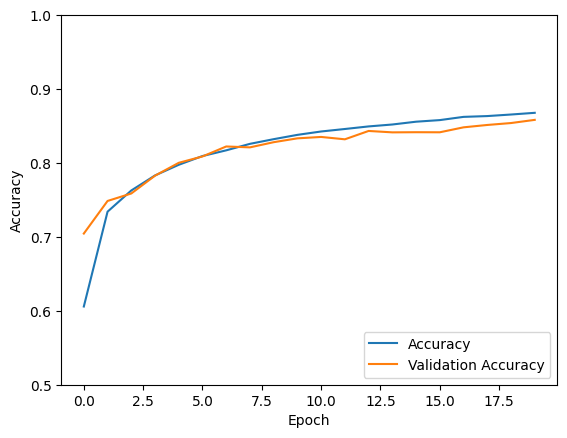

In [31]:
plt.plot(CNN.history['accuracy'],label='Accuracy')
plt.plot(CNN.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [34]:
import pickle as pkl
file_img = 'CNN_Basics_2.pkl'
with open(file_img,'wb') as file:
    pkl.dump(model,file)